<a href="https://www.kaggle.com/code/uzairajokhio/ipl-2023-auction-eda?scriptVersionId=182866896" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align: center;">
  <img src="https://upload.wikimedia.org/wikipedia/en/a/a2/TATA_IPL_2023_Logo.png" alt="IPL Logo">
</div>

In [1]:
# Importing all necessary libraries 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/ipl-auction-2023/iplauction2023.csv')
data.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [4]:
data.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [5]:
data.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

### **In this Analysis we are only intrested in sold and reatined player so we have to remove all unsold player**

In [6]:
ipl_player = data[(data['status'] == 'SOLD') | (data['status'] == 'RETAINED')]

In [7]:
ipl_player.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)      0
franchise                  0
status                     0
dtype: int64

## *Base price (in lacs)* has 158 null value because these are reatined player that the team hasnt sold

In [8]:
ipl_player.head()
ipl_player['status'].value_counts()

status
RETAINED    158
SOLD         80
Name: count, dtype: int64

## There are **158** *Retained player* where else **80** *Sold player*

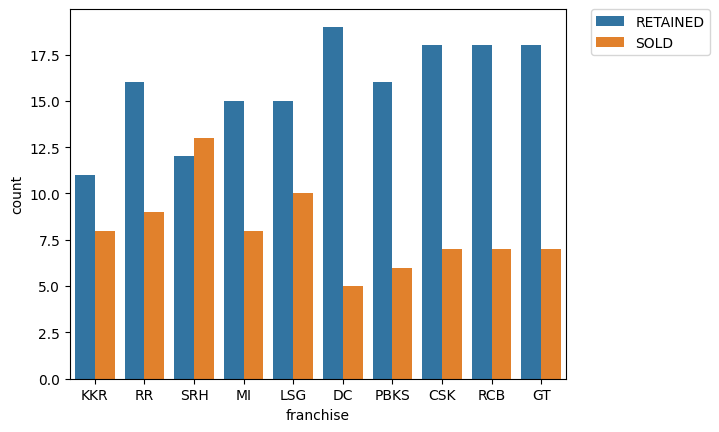

In [9]:
sns.countplot(data=ipl_player, x='franchise', hue='status')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

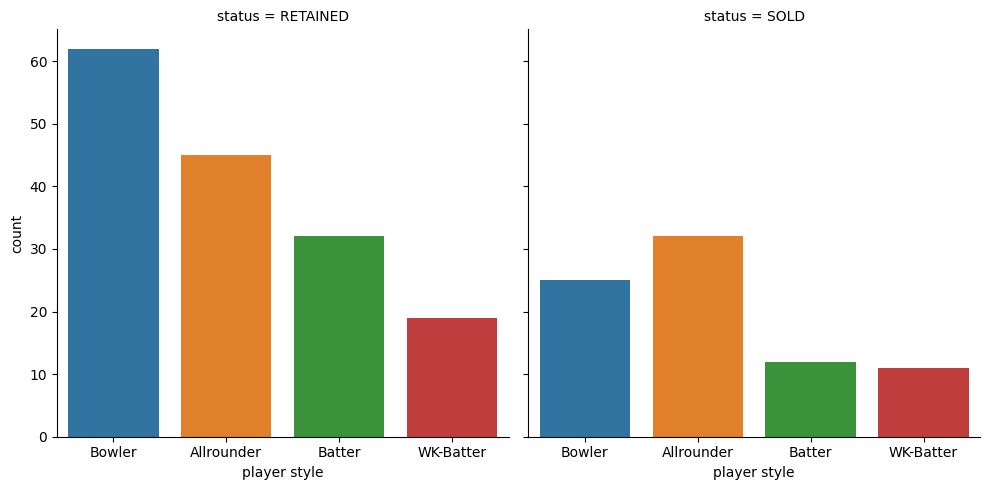

In [10]:
sns.catplot(data=ipl_player, x='player style', kind='count', col='status')

In [11]:
sold_player = ipl_player[ipl_player['status'] == 'SOLD']
retain_player = ipl_player[ipl_player['status'] == 'RETAINED']

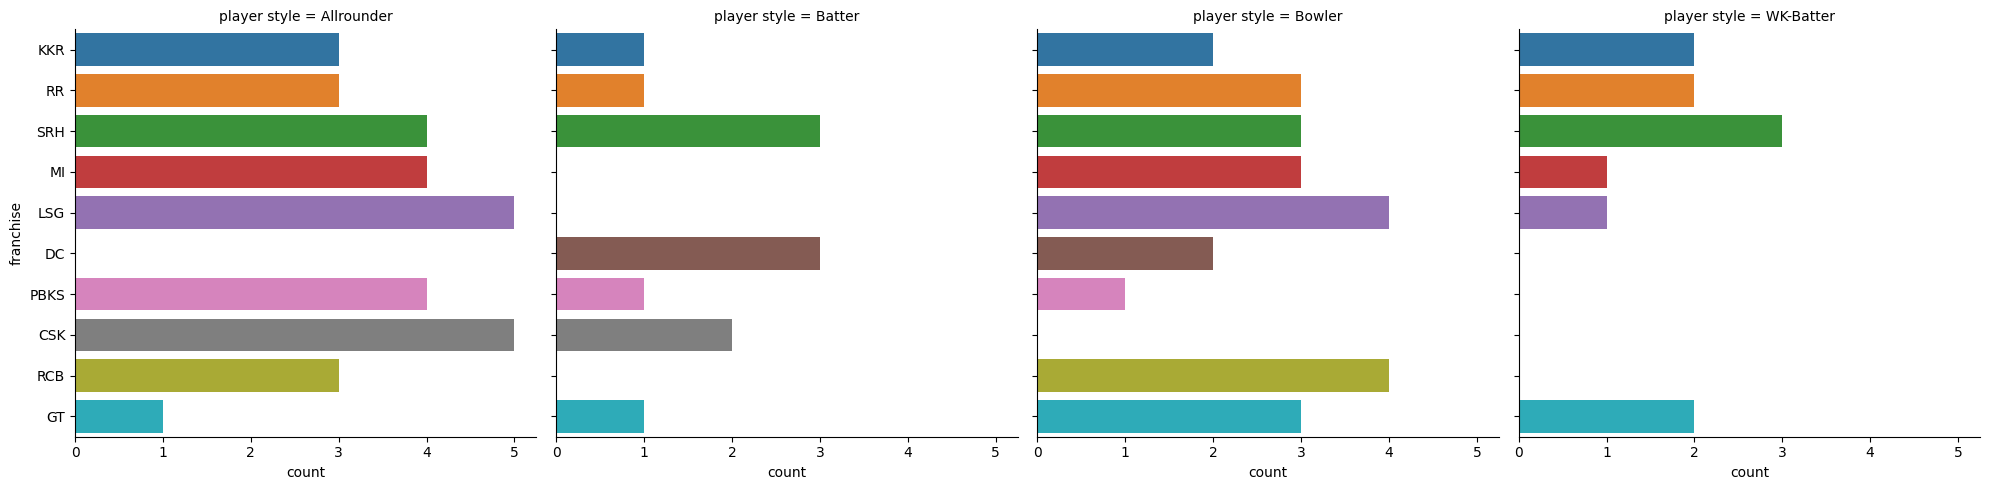

In [12]:
sns.catplot(data=sold_player, y='franchise', kind='count', col='player style')

## *The most Expensive player **sold** in IPL 2023*

In [13]:
most_exp_ply = sold_player[sold_player['final price (in lacs)'] == sold_player['final price (in lacs)'].max()]
most_exp_ply

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
150,Sam Curran,Allrounder,England,200.0,1850.0,PBKS,SOLD


> Sam Curran was sold for 1850 lacs to PBKS

## *The top **5** least Expensive player sold in IPL 2023*

In [14]:
least_exp_ply  = sold_player[sold_player['final price (in lacs)'] == sold_player['final price (in lacs)'].min()]
least_exp_ply.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
8,Raghav Goyal,Bowler,India,20.0,20.0,MI,SOLD
9,Yudhvir Singh Charak,Allrounder,India,20.0,20.0,LSG,SOLD
14,Akash Vashist,Allrounder,India,20.0,20.0,RR,SOLD
19,Murugan Ashwin,Bowler,India,20.0,20.0,RR,SOLD


In [15]:
batter = sold_player[(sold_player['player style'] == 'Batter')]
exp_batter = batter[batter['final price (in lacs)'] == batter['final price (in lacs)'].max()]
exp_batter

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
151,Harry Brook,Batter,England,150.0,1325.0,SRH,SOLD


> Harry Brook was the expensive batsmen sold 1350 lacs to SRH

In [16]:
bowler = sold_player[(sold_player['player style'] == 'Bowler')]
exp_bowler = bowler[bowler['final price (in lacs)'] == bowler['final price (in lacs)'].max()]
exp_bowler

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
104,Shivam Mavi,Bowler,India,40.0,600.0,GT,SOLD


> the expensive bowler sold in ipl 2023

In [17]:
keeper = sold_player[(sold_player['player style'] == 'WK-Batter')]
exp_keeper = keeper[keeper['final price (in lacs)'] == keeper['final price (in lacs)'].max()]
exp_keeper

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
136,Nicholas Pooran,WK-Batter,West Indies,200.0,1600.0,LSG,SOLD


>  the expensive Wicket keeper batter solin ipl 2023

# Player styles by nationality:

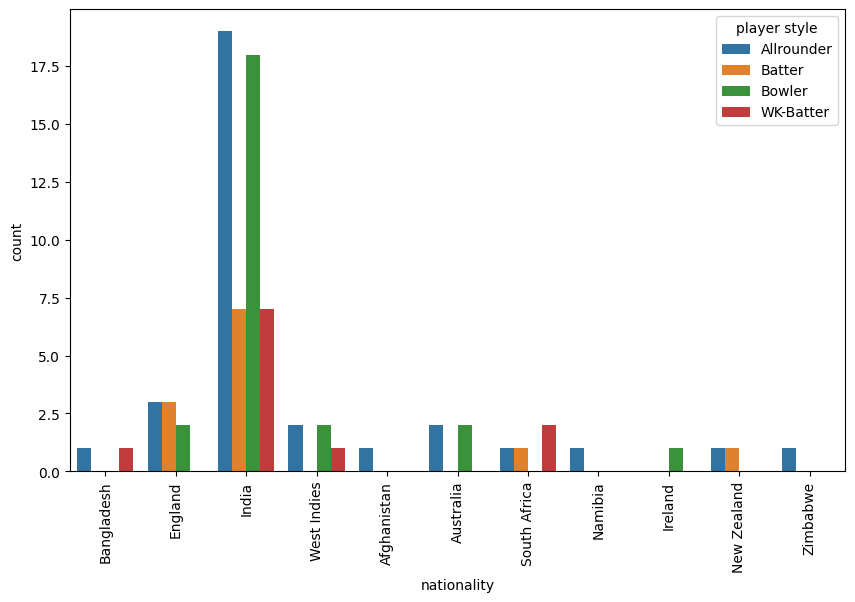

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='nationality', hue='player style', data=sold_player)
plt.xticks(rotation=90)
plt.show()

# Average final price by nationality:

In [19]:
sold_player.groupby('nationality')['final price (in lacs)'].mean()

nationality
Afghanistan      50.000000
Australia       531.250000
Bangladesh      100.000000
England         726.250000
India            82.254902
Ireland         440.000000
Namibia         100.000000
New Zealand     150.000000
South Africa    263.750000
West Indies     475.000000
Zimbabwe         50.000000
Name: final price (in lacs), dtype: float64

# Money spend by Franchise

In [20]:
sold_player.groupby('franchise')['final price (in lacs)'].sum()

franchise
CSK     1895.0
DC      1500.0
GT      1480.0
KKR      540.0
LSG     1980.0
MI      2050.0
PBKS    2000.0
RCB      700.0
RR       985.0
SRH     3570.0
Name: final price (in lacs), dtype: float64